# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

You're probably going to need PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
!mkdir data

Un sous-r�pertoire ou un fichier data existe d�j�.


1. PyTorch is based on tensor operations. First' let's try using them:
- create simple python list with four values and convert it to PyTorch tensor
- create numpy array with random values and shape (1,3,7,7) and convert it to Pytorch tensor
- create PyTorch tensor with random values and shape (1,3,7,7) with preset seed
- create PyTorch tensor with linear space in range from -5 to 15 and reshape it to tensor with shape (1,3,7,7)
- create PyTorch tensor of zeros with shape (1,3,7,7)

For display use `print` function.

In [2]:
import torch
import numpy as np

In [3]:
a = [1, 2, 3, 4]
b = torch.FloatTensor(a)
b

tensor([1., 2., 3., 4.])

In [4]:
# Create a NumPy array with random values
numpy_array = np.random.rand(1, 3, 7, 7)
pytorch_tensor = torch.FloatTensor(numpy_array)
pytorch_tensor

tensor([[[[0.0379, 0.8730, 0.2202, 0.6520, 0.9042, 0.3095, 0.1037],
          [0.4859, 0.2326, 0.2305, 0.5839, 0.0144, 0.1570, 0.0264],
          [0.9869, 0.0430, 0.9657, 0.7244, 0.4059, 0.5409, 0.9382],
          [0.1729, 0.6483, 0.4458, 0.1315, 0.2713, 0.9184, 0.0916],
          [0.9412, 0.2564, 0.8167, 0.0647, 0.0442, 0.0107, 0.5712],
          [0.9165, 0.1340, 0.7772, 0.2038, 0.2211, 0.0386, 0.6312],
          [0.1338, 0.1925, 0.1157, 0.7796, 0.9284, 0.2814, 0.7174]],

         [[0.6696, 0.2913, 0.5150, 0.3051, 0.4526, 0.1705, 0.1516],
          [0.2818, 0.5491, 0.9707, 0.5913, 0.9907, 0.3903, 0.1928],
          [0.7391, 0.1670, 0.8375, 0.2820, 0.6068, 0.1927, 0.6178],
          [0.1909, 0.2531, 0.0395, 0.5477, 0.7469, 0.3336, 0.4016],
          [0.2360, 0.1701, 0.4473, 0.0262, 0.2382, 0.8601, 0.3838],
          [0.8819, 0.4131, 0.6603, 0.4141, 0.2522, 0.5572, 0.6295],
          [0.7767, 0.8552, 0.3810, 0.1654, 0.7547, 0.1911, 0.2463]],

         [[0.7249, 0.5621, 0.8863, 0.7626, 0

In [5]:
torch.manual_seed(42)
pytorch_tensor = torch.rand(1, 3, 7, 7)
pytorch_tensor

tensor([[[[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566],
          [0.7936, 0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677],
          [0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274, 0.2696],
          [0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994],
          [0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832, 0.3376],
          [0.8090, 0.5779, 0.9040, 0.5547, 0.3423, 0.6343, 0.3644],
          [0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895, 0.7539]],

         [[0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071],
          [0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542],
          [0.3278, 0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018],
          [0.9497, 0.6666, 0.9811, 0.0874, 0.0041, 0.1088, 0.1637],
          [0.7025, 0.6790, 0.9155, 0.2418, 0.1591, 0.7653, 0.2979],
          [0.8035, 0.3813, 0.7860, 0.1115, 0.2477, 0.6524, 0.6057],
          [0.3725, 0.7980, 0.8399, 0.1374, 0.2331, 0.9578, 0.3313]],

         [[0.3227, 0.0162, 0.2137, 0.6249, 0

In [6]:
start = -5
end = 15
num_points = 1 * 3 * 7 * 7
linear_space = torch.linspace(start, end, num_points)

desired_shape = (1, 3, 7, 7)
pytorch_tensor = linear_space.view(desired_shape)

pytorch_tensor

tensor([[[[-5.0000, -4.8630, -4.7260, -4.5890, -4.4521, -4.3151, -4.1781],
          [-4.0411, -3.9041, -3.7671, -3.6301, -3.4932, -3.3562, -3.2192],
          [-3.0822, -2.9452, -2.8082, -2.6712, -2.5342, -2.3973, -2.2603],
          [-2.1233, -1.9863, -1.8493, -1.7123, -1.5753, -1.4384, -1.3014],
          [-1.1644, -1.0274, -0.8904, -0.7534, -0.6164, -0.4795, -0.3425],
          [-0.2055, -0.0685,  0.0685,  0.2055,  0.3425,  0.4795,  0.6164],
          [ 0.7534,  0.8904,  1.0274,  1.1644,  1.3014,  1.4384,  1.5753]],

         [[ 1.7123,  1.8493,  1.9863,  2.1233,  2.2603,  2.3973,  2.5342],
          [ 2.6712,  2.8082,  2.9452,  3.0822,  3.2192,  3.3562,  3.4932],
          [ 3.6301,  3.7671,  3.9041,  4.0411,  4.1781,  4.3151,  4.4521],
          [ 4.5890,  4.7260,  4.8630,  5.0000,  5.1370,  5.2740,  5.4110],
          [ 5.5479,  5.6849,  5.8219,  5.9589,  6.0959,  6.2329,  6.3699],
          [ 6.5068,  6.6438,  6.7808,  6.9178,  7.0548,  7.1918,  7.3288],
          [ 7.4658,  7.

In [7]:
shape = (1, 3, 7, 7)
zeros_tensor = torch.zeros(shape)

zeros_tensor


tensor([[[[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.]]]])

2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`. Then, move one of your tensors to selected device.

In [13]:
cuda = torch.cuda.is_available()
cuda
device = torch.device("cpu")
device

device(type='cpu')

3. To train a networks we need a dataset.

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display few images and their labels.

Finally, compare the number of object in each class in both datasets.

Train dataset size: 60000
Test dataset size: 10000
Shape of data in train_loader: torch.Size([64, 1, 28, 28])
Shape of labels in train_loader: torch.Size([64])


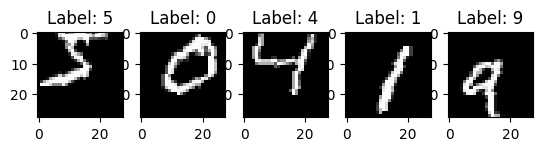

Train dataset class distribution:
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Test dataset class distribution:
Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


In [10]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the transformations
train_transform = transforms.Compose([
    transforms.RandomRotation(10),  # Random rotation up to 10 degrees
    transforms.RandomCrop(28, padding=4),  # Random crop with padding
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
    transforms.ToTensor()  # Convert to a PyTorch tensor
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=train_transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=test_transform, download=True)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

data, label = next(iter(train_loader))
print(f"Shape of data in train_loader: {data.shape}")
print(f"Shape of labels in train_loader: {label.shape}")

import matplotlib.pyplot as plt

for i in range(5):
    image, label = train_dataset[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")

plt.show()

from collections import Counter

train_class_distribution = Counter(train_dataset.targets.numpy())
test_class_distribution = Counter(test_dataset.targets.numpy())

print("Train dataset class distribution:")
print(train_class_distribution)

print("Test dataset class distribution:")
print(test_class_distribution)

5. We have our dataset ready, lets create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first layer with 512 neurons,
- second layer with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.

Layers:
- `torch.nn.Sequential`
    - layer allows for forward pass through
        component layers:
        ```
        t_in: Tensor
        t_out: Tensor = t_in
        for L in layers:
            t_out = L(t_out)
        return t_out```
        
- `torch.nn.Flatten`
    - layer makes input tensor flattened:
    - (bs,CH,H,W) - > (bs,CH*H*W)
    
- `torch.nn.Linear(ch_in, ch_out, bias)`
    - 'classical' neural network layer - fully connected
    - ch_in is a number of input channels
    - ch_out is number of output channels / number of neurons in layer
    - bias - whether to use bias parameter
    - for Linear layers it is recommended to use flatten layer before,
            when input has more than 2 dimensions
    - operation implemented by this layer is a vector / matrix multiplication
        - `y = W x v` or `y = W x v + b`
        - W has a shape [ch_out, ch_in]
        - v has a shape [ch_in]
        - b has a shape [ch_in]
        - y has a shape [ch_out]

- `torch.nn.ReLU`
    - layer applies ReLU function on input tensor
    
- `torch.nn.Softmax(dim)`
    - layer applies softmax function on input tensor
    - `dim` - dimension over which function is calculated


For the formulas of activation function go to [torch documentation](https://pytorch.org/docs/stable/index.html)

In [19]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_shape, output_size):
        super(MLP, self).__init__()
        
        # Define the layers
        self.layers = nn.Sequential(
            nn.Flatten(),          # Flatten the input
            nn.Linear(input_shape, 512),  # First hidden layer with 512 neurons
            nn.ReLU(),             # ReLU activation function
            nn.Linear(512, 512),    # Second hidden layer with 512 neurons
            nn.ReLU(),             # ReLU activation function
            nn.Linear(512, output_size)  # Output layer (adjust to the classification problem)
        )
        self.softmax = nn.Softmax(dim=1)  # Apply softmax to the output

    def forward(self, x):
        # Pass the input tensor through the layers
        x = self.layers(x)
        # Apply softmax to the output
        x = self.softmax(x)
        return x

# Instantiate the MLP model
input_shape = 1 * 28 * 28  # Assuming 28x28 images with 1 channel
output_size = 10  # Adjust the output size for your specific classification problem
net = MLP(input_shape, output_size)
net = net.to(device)


6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [20]:
loss_fcn = nn.CrossEntropyLoss()


7. To score network define accuracy metric.
For network output you need to decide what is the final network answer. For clasification we can assume, that the final answer is the class with highest probability (`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [21]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetic(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()



class AccuracyMetic(BaseMetic):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        # Get the predicted class (index with the highest probability) for each sample
        predicted_classes = y_pred.argmax(dim=1)

        # Compare the predicted classes to the reference labels
        correct_predictions = (predicted_classes == y_ref).sum().item()

        # Calculate the accuracy
        accuracy = correct_predictions / y_ref.size(0)  # Divide by the batch size

        return torch.tensor(accuracy)

metric = AccuracyMetic()


8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

In [22]:
import torch.optim as optim

learning_rate = 0.001

optimizer = optim.SGD(net.parameters(), lr=learning_rate)

9. Now define training / testing function:

10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement stopping training when accuracy .

In [25]:
from typing import Tuple
import tqdm
import torch

def train_or_test(model, data_generator, criterion, metric, mode='test', optimizer=None, update_period=None, device=torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:
    # Change model mode to train or test
    if mode == 'train':
        model.train()
    elif mode == 'test':
        model.eval()
    else:
        raise RuntimeError("Unsupported mode.")

    # Move model to the specified device
    model.to(device)

    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0

    for i, (X, y) in tqdm.tqdm(enumerate(data_generator)):
        # Convert tensors to the specified device
        X, y = X.to(device), y.to(device)

        # Process input data through the network
        y_pred = model(X)

        # Calculate loss
        loss = criterion(y_pred, y)

        # Reset gradients and perform backpropagation if in training mode
        if mode == 'train':
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Calculate accuracy
        accuracy = metric(y_pred, y)

        total_loss += loss.item() * y_pred.size(0)
        total_accuracy += accuracy.item() * y_pred.size(0)
        samples_num += y_pred.size(0)

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num


11. Display training history.

938it [00:25, 36.88it/s]
157it [00:01, 110.03it/s]


Epoch 1/10:
  Train Loss: 2.3025  Train Accuracy: 0.0960
  Test Loss: 2.3028  Test Accuracy: 0.0965


938it [00:24, 38.17it/s]
157it [00:01, 111.30it/s]


Epoch 2/10:
  Train Loss: 2.3025  Train Accuracy: 0.0967
  Test Loss: 2.3027  Test Accuracy: 0.0976


938it [00:23, 39.40it/s]
157it [00:01, 108.24it/s]


Epoch 3/10:
  Train Loss: 2.3024  Train Accuracy: 0.0974
  Test Loss: 2.3026  Test Accuracy: 0.0977


938it [00:24, 37.77it/s]
157it [00:01, 106.87it/s]


Epoch 4/10:
  Train Loss: 2.3023  Train Accuracy: 0.0978
  Test Loss: 2.3025  Test Accuracy: 0.0981


938it [00:25, 37.46it/s]
157it [00:01, 98.96it/s]


Epoch 5/10:
  Train Loss: 2.3023  Train Accuracy: 0.0985
  Test Loss: 2.3024  Test Accuracy: 0.0982


938it [00:29, 31.38it/s]
157it [00:01, 108.90it/s]


Epoch 6/10:
  Train Loss: 2.3022  Train Accuracy: 0.0987
  Test Loss: 2.3023  Test Accuracy: 0.0981


938it [00:23, 40.08it/s]
157it [00:01, 118.12it/s]


Epoch 7/10:
  Train Loss: 2.3022  Train Accuracy: 0.0986
  Test Loss: 2.3022  Test Accuracy: 0.0981


938it [00:24, 39.01it/s]
157it [00:01, 104.76it/s]


Epoch 8/10:
  Train Loss: 2.3021  Train Accuracy: 0.0987
  Test Loss: 2.3021  Test Accuracy: 0.0981


938it [00:24, 38.59it/s]
157it [00:01, 109.38it/s]


Epoch 9/10:
  Train Loss: 2.3020  Train Accuracy: 0.0992
  Test Loss: 2.3019  Test Accuracy: 0.0981


938it [00:25, 37.02it/s]
157it [00:01, 111.12it/s]


Epoch 10/10:
  Train Loss: 2.3020  Train Accuracy: 0.0988
  Test Loss: 2.3018  Test Accuracy: 0.0981


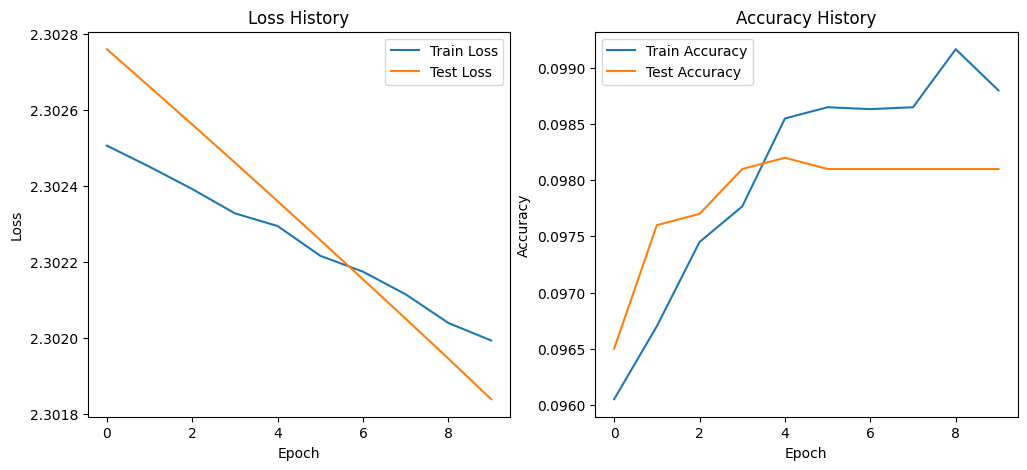

In [26]:
import matplotlib.pyplot as plt

def train_and_display(model, train_loader, test_loader, criterion, metric, optimizer, device, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model, train_loss, train_accuracy = train_or_test(
            model, train_loader, criterion, metric, mode='train', optimizer=optimizer, device=device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Testing phase
        model, test_loss, test_accuracy = train_or_test(
            model, test_loader, criterion, metric, mode='test', device=device)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}:")
        print(f"  Train Loss: {train_loss:.4f}  Train Accuracy: {train_accuracy:.4f}")
        print(f"  Test Loss: {test_loss:.4f}  Test Accuracy: {test_accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss History')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy History')

    plt.show()

# Example usage:
num_epochs = 10
train_and_display(net, train_loader, test_loader, loss_fcn, metric, optimizer, device, num_epochs)


12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [28]:
# Save model state to a file
model_state_file = 'model_state.pth'
torch.save(net.state_dict(), model_state_file)

# Save optimizer state to a file
optimizer_state_file = 'optimizer_state.pth'
torch.save(optimizer.state_dict(), optimizer_state_file)

13. Create new network with the same architecture and initialize it with saved weights. Compare evaluations for both networks

`torch.load`, `load_state_dict`.

In [29]:
# Define the architecture of net2 (same as net)
net2 = MLP(input_shape, output_size)

# Load the saved model state into net2
model_state_file = 'model_state.pth'
net2.load_state_dict(torch.load(model_state_file))

# Ensure both networks are in evaluation mode
net.eval()
net2.eval()

# Compare evaluations for both networks
# You can use the `train_or_test` function defined earlier
# with the test_loader, criterion, metric, and device
_, test_loss1, test_accuracy1 = train_or_test(net, test_loader, loss_fcn, metric, mode='test', device=device)
_, test_loss2, test_accuracy2 = train_or_test(net2, test_loader, loss_fcn, metric, mode='test', device=device)

print(f"Network 1 - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_accuracy1:.4f}")
print(f"Network 2 - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_accuracy2:.4f}")


157it [00:01, 111.14it/s]
157it [00:01, 110.24it/s]

Network 1 - Test Loss: 2.3018, Test Accuracy: 0.0981
Network 2 - Test Loss: 2.3018, Test Accuracy: 0.0981


14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [35]:
class MLP(nn.Module):
    def __init__(self, input_shape, output_size):
        super(MLP, self).__init__()

        # Define the layers
        self.layers = nn.Sequential(
            nn.Flatten(),  # Flatten the input
            nn.Linear(input_shape, 512),  # First hidden layer with 512 neurons
            nn.ReLU(),  # ReLU activation function
            nn.Linear(512, 256),  # Additional hidden layer with 256 neurons
            nn.ReLU(),  # Activation function for the new hidden layer
            nn.Linear(256, 512),  # Another hidden layer, if needed
            nn.ReLU(),  # Activation function
            nn.Linear(512, output_size)
        )
        self.softmax = nn.Softmax(dim=1)  # Apply softmax to the output

    def forward(self, x):
        # Pass the input tensor through the layers
        x = self.layers(x)
        # Apply softmax to the output
        x = self.softmax(x)
        return x


# Instantiate the MLP model
input_shape = 1 * 28 * 28  # Assuming 28x28 images with 1 channel
output_size = 10  # Adjust the output size for your specific classification problem
net3 = MLP(input_shape, output_size)
net3 = net3.to(device)

938it [00:49, 19.06it/s]
157it [00:01, 106.95it/s]


Epoch 1/10:
  Train Loss: 2.3026  Train Accuracy: 0.0875
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:38, 24.39it/s]
157it [00:01, 100.13it/s]


Epoch 2/10:
  Train Loss: 2.3026  Train Accuracy: 0.0877
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:41, 22.75it/s]
157it [00:01, 104.01it/s]


Epoch 3/10:
  Train Loss: 2.3026  Train Accuracy: 0.0880
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:25, 36.23it/s]
157it [00:01, 105.48it/s]


Epoch 4/10:
  Train Loss: 2.3026  Train Accuracy: 0.0873
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:25, 36.23it/s]
157it [00:01, 117.02it/s]


Epoch 5/10:
  Train Loss: 2.3026  Train Accuracy: 0.0890
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:26, 35.75it/s]
157it [00:01, 109.10it/s]


Epoch 6/10:
  Train Loss: 2.3026  Train Accuracy: 0.0882
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:25, 37.51it/s]
157it [00:01, 107.45it/s]


Epoch 7/10:
  Train Loss: 2.3026  Train Accuracy: 0.0888
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:25, 36.40it/s]
157it [00:01, 96.82it/s] 


Epoch 8/10:
  Train Loss: 2.3026  Train Accuracy: 0.0874
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:25, 37.16it/s]
157it [00:01, 111.86it/s]


Epoch 9/10:
  Train Loss: 2.3026  Train Accuracy: 0.0884
  Test Loss: 2.3026  Test Accuracy: 0.0752


938it [00:24, 38.98it/s]
157it [00:01, 113.98it/s]


Epoch 10/10:
  Train Loss: 2.3026  Train Accuracy: 0.0878
  Test Loss: 2.3026  Test Accuracy: 0.0752


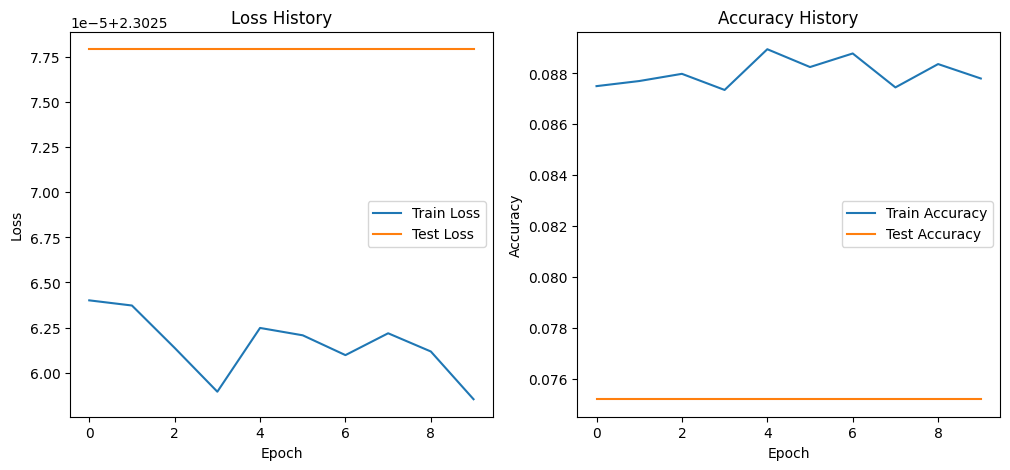

In [36]:
train_and_display(net3, train_loader, test_loader, loss_fcn, metric, optimizer, device, num_epochs)

In [37]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 1 input channel, 32 output channels, 3x3 kernel
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max-pooling layer
            nn.BatchNorm2d(32),  # Batch normalization
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),  # Fully connected layer
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout layer for regularization
            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Instantiate the custom model
custom_net = CustomCNN(num_classes=10)


# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_net.parameters(), lr=0.001)

train_and_display(custom_net, train_loader, test_loader, loss_fn, metric, optimizer, device, num_epochs)

# Save the model state to a file
model_state_file = 'custom_model_state.pth'
torch.save(custom_net.state_dict(), model_state_file)


AttributeError: 'super' object has no attribute '_CustomCNN__init'